# KNN - DBSCAN - ANOMALY

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

## Generate Sample Dataset

In [2]:
# Create a moon-shaped dataset with noise
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

## Data Scaling

In [3]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determine Optimal k using KMeans

In [4]:
# Initialize an empty list to store inertia values
inertia = []
k_range = range(1, 11)  # Check for k from 1 to 10

# Calculate inertia for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [5]:
kneedle = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f'Optimal number of clusters (k): {optimal_k}')


Optimal number of clusters (k): 3


###  k=3 

# Plotting 

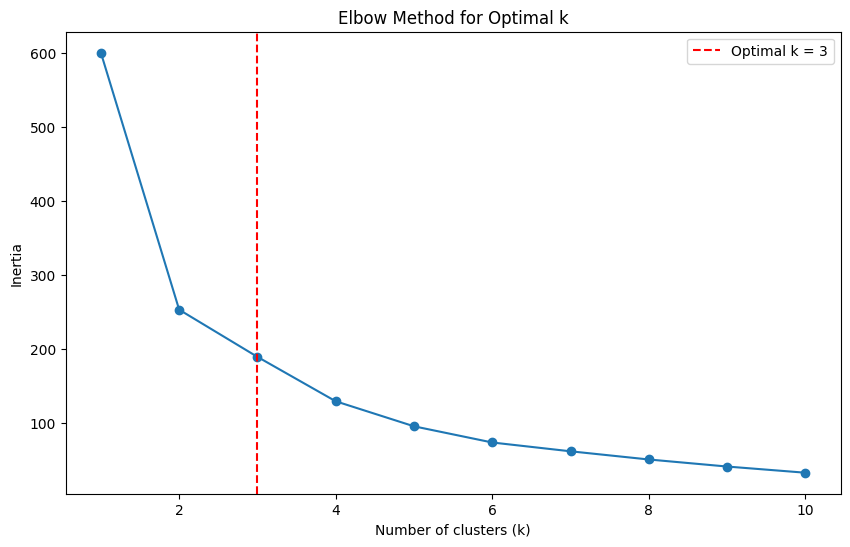

In [6]:
# Plot Elbow Method for Optimal k
# ==========================
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

## Apply K-Means Clustering


In [7]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

## Apply DBSCAN for Anomaly Detection

In [8]:
# Fit DBSCAN to the scaled data
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

##  Visualisation

In [9]:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['KMeans Cluster'] = kmeans_labels
df['DBSCAN Cluster'] = dbscan_labels

## Plotting K-Means Clusters

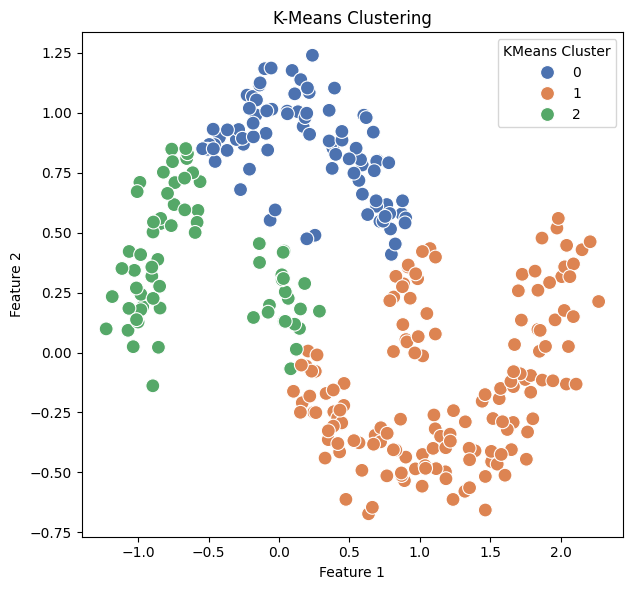

In [10]:
plt.figure(figsize=(12, 6))
# Subplot for K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='KMeans Cluster', palette='deep', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()


## Plotting DBSCAN Clusters with Anomalies

In [11]:
# Create a unique list of DBSCAN cluster labels
unique_labels = np.unique(dbscan_labels)

# Create a marker dictionary dynamically
marker_dict = {label: 'o' for label in unique_labels if label != -1}  # Use 'o' for normal clusters
marker_dict[-1] = 'X'  # Use 'X' for noise points


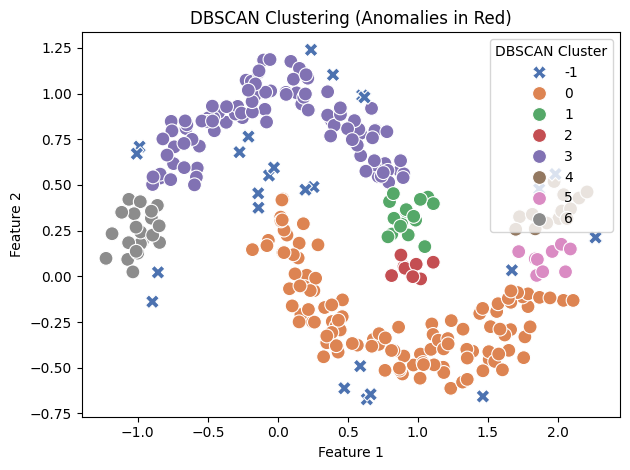

In [12]:

# Highlight anomalies in a different color
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', 
                hue='DBSCAN Cluster', 
                palette='deep', 
                s=100, 
                style='DBSCAN Cluster', 
                markers=marker_dict)

plt.title('DBSCAN Clustering (Anomalies in Red)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add legend for noise points
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='DBSCAN Cluster', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Conclusion



In this notebook, we performed clustering analysis on a synthetic moon-shaped dataset using two different algorithms: **K-Means** and **DBSCAN**. 

1. **K-Means Clustering**:
   - The optimal number of clusters for the K-Means algorithm was determined using the Elbow method, which revealed a clear "knee" point at `k = {optimal_k}`. 
   - The K-Means algorithm effectively grouped the data points into distinct clusters, as illustrated in the left plot. Each cluster is represented by a different color, showcasing how K-Means captures the overall structure of the data.

2. **DBSCAN Clustering**:
   - The DBSCAN algorithm was applied to identify clusters and anomalies within the dataset. Unlike K-Means, DBSCAN does not require a predefined number of clusters, making it useful for identifying clusters of varying shapes and densities.
   - The right plot highlights the clusters identified by DBSCAN, with points marked as noise (anomalies) shown as 'X'. This feature is particularly valuable in real-world applications where noise and outliers can significantly affect analysis.

3. **Comparison of Results**:
   - While K-Means is effective for convex-shaped clusters and requires the specification of the number of clusters, DBSCAN excels at detecting clusters of arbitrary shape and can handle noise effectively.
   - The choice of clustering algorithm should be guided by the specific characteristics of the dataset and the goals of the analysis.

Overall, this analysis demonstrates the power of clustering techniques in uncovering patterns in data. Further exploration can involve hyperparameter tuning for both algorithms and applying these techniques to more complex datasets to assess their robustness and effectiveness.
